In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [10]:
# Find the most recent date in the data set.
recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(f'The most recent date in the data set is: {recent_date[0]}')

The most recent date in the data set is: 2017-08-23


In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

In [12]:
# Calculate the date one year from the last date in data set.
dates = dt.date(2017, 8, 23) - dt.timedelta(days=365)

In [13]:
# Perform a query to retrieve the data and precipitation scores
results = session.query(Measurement.date, func.avg(Measurement.prcp)).\
            filter(Measurement.date.between (dates, dt.date(2017, 8, 23))).group_by('date')

In [14]:
# Save the query results as a Pandas DataFrame and set the index to the date column
recent_df = pd.DataFrame(results, columns=['Date', 'Precipitation'])

In [15]:
# Sort the dataframe by date
recent_df.set_index('Date', inplace=True)
recent_df.sort_values(by='Date')
recent_df.head(10)

,Precipitation
Date,
2016-08-23,0.451667
2016-08-24,1.555000
2016-08-25,0.077143
2016-08-26,0.016667
2016-08-27,0.064000
2016-08-28,0.516667
2016-08-29,0.243333
2016-08-30,0.011667
2016-08-31,0.636000


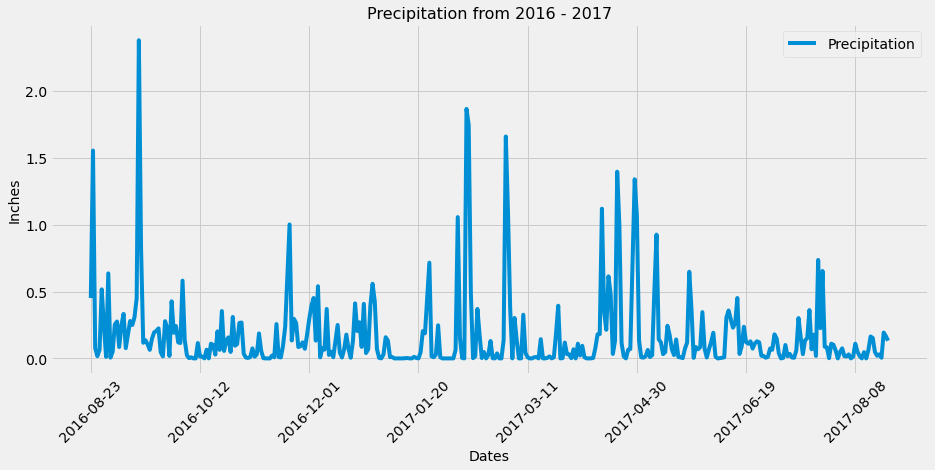

In [16]:
# Use Pandas Plotting with Matplotlib to plot the data
recent_df.plot(figsize= (14,6), rot = 45);
plt.ylabel(f'Inches', size=14)
plt.xlabel(f'Dates', size=14)
plt.title(f'Precipitation from 2016 - 2017', size=16)
plt.savefig("Images/Precipitation for Au16-Aug17.png", bbox_inches = "tight")
plt.show()

In [17]:
# Use Pandas to calcualte the summary statistics for the precipitation data
recent_df.describe()

,Precipitation
count,366.000000
mean,0.170757
std,0.295683
min,0.000000
25%,0.008571
50%,0.070000
75%,0.191667
max,2.380000


# Exploratory Station Analysis

In [18]:
# Design a query to calculate the total number stations in the dataset
station_total = session.query(Station).count()
print(f'There are a total of {station_total} stations')

There are a total of 9 stations


In [19]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
active_station = session.query(Measurement.station, func.count(Measurement.date)).group_by(Measurement.station).\
    order_by(func.count(Measurement.date).desc()).all()

active_station_df = pd.DataFrame(active_station, columns=['Station ID', 'Activity by Rows'])
active_station_df

,Station ID,Activity by Rows
0,USC00519281,2772
1,USC00519397,2724
2,USC00513117,2709
3,USC00519523,2669
4,USC00516128,2612
5,USC00514830,2202
6,USC00511918,1979
7,USC00517948,1372
8,USC00518838,511


In [20]:
most_active_station=session.query(Measurement.station).group_by(Measurement.station).\
    order_by(func.count(Measurement.date).desc()).first()
most_active= most_active_station[0]

In [21]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_station=session.query(Measurement.station, func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
    filter(Measurement.station==most_active).all()

print(f'Most Active Station: {most_active}')
print(f'Average Lowest Temperature: {most_active_station[0][1]} degrees') 
print(f'Average Highest Temperature: {most_active_station[0][2]} degrees')
print(f'Average Temperature: {round(most_active_station[0][3],1)} degrees')

Most Active Station: USC00519281
Average Lowest Temperature: 54.0 degrees
Average Highest Temperature: 85.0 degrees
Average Temperature: 71.7 degrees


In [22]:
# Using the most active station id, Query the last 12 months of temperature observation data for this station 

most_active_temp_data=session.query(Measurement.tobs).filter(Measurement.station==most_active).\
    filter(Measurement.date>=dates).all()

most_active_temps_df = pd.DataFrame(most_active_temp_data, columns=['tobs'])

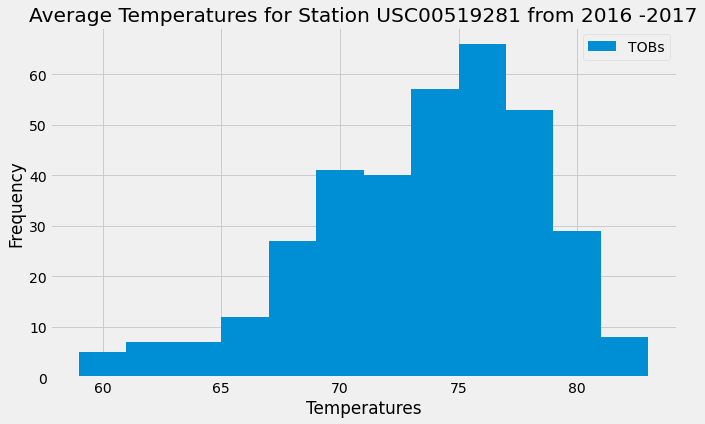

In [23]:
#Plot data as a histogram

most_active_temps_df.plot.hist(figsize = (10,6), bins=12)
plt.title(f'Average Temperatures for Station {most_active} from 2016 -2017')
plt.xlabel('Temperatures')
plt.legend(["TOBs"])
plt.savefig('Images/Average Temperatures for Station USC00519281.png', bbox_inches = "tight")

plt.show()

# Close session

In [24]:
# Close Session
session.close()